In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

file_path = "C:/Users/pyj66/.vscode/포폴/마케팅캠페인/updated_marketing_activities_dataset_2022_2023_updated_marketing_activities_dataset_2022_2023 (1).csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,Activity Date,Activity Type,Campaign ID,Campaign Name,Campaign Objective,Channel,Conversion Funnel Stage,Source,Target Audience,Visibility,Campaign Duration,Clicks,Conversion Rate,Conversions,Cost,Engagement Rate,Engagement Time,Impressions,Revenue,ROI
0,2022-02-06,Click,Campaign-6604GF,Up-sized dedicated forecast,Lead Generation,Facebook,Consideration,Referral,New Visitors,Public,75,99,0.18,12,570.29,0.12,217,1025,920.42,-69.06
1,2023-08-26,Engagement,Campaign-6475Ln,Realigned demand-driven firmware,Brand Awareness,Twitter,Decision,Email,Segmented Audience,Public,14,117,0.02,12,600.48,0.86,272,1009,767.32,128.40
2,2023-02-09,Ad Display,Campaign-8242Wg,Centralized multimedia hierarchy,Lead Generation,Instagram,Consideration,Referral,Subscribers,Restricted,50,77,0.13,10,512.95,0.29,154,1030,1007.48,289.22
3,2023-05-16,Click,Campaign-9489jt,Team-oriented upward-trending forecast,Sales Conversion,Instagram,Decision,PPC,Subscribers,Private,73,105,0.02,13,408.22,0.91,14,1014,1049.43,-34.94
4,2023-07-08,Engagement,Campaign-1157Jg,Networked clear-thinking alliance,Lead Generation,Instagram,Awareness,PPC,Subscribers,Private,43,110,0.18,11,855.90,0.82,132,1014,1047.36,193.97


In [4]:
# 데이터 타입 변환
df["Activity Date"] = pd.to_datetime(df["Activity Date"])
df["Year"] = df["Activity Date"].dt.year
df[["Activity Date","Year"]].head()

,Activity Date,Year
0,2022-02-06,2022
1,2023-08-26,2023
2,2023-02-09,2023
3,2023-05-16,2023
4,2023-07-08,2023


In [5]:
# 목표-퍼널 일치 여부 변수 생성
df["Objective-Funnel Match"] = df.apply(
    lambda x: "Match" if (x["Campaign Objective"] == "Brand Awareness" and x["Conversion Funnel Stage"] == "Awareness") or 
                      (x["Campaign Objective"] == "Lead Generation" and x["Conversion Funnel Stage"] == "Consideration") or
                      (x["Campaign Objective"] == "Sales Conversion" and x["Conversion Funnel Stage"] == "Decision") 
              else "Mismatch", axis=1)

Objective-Funnel Match
Mismatch    671
Match       329
Name: count, dtype: int64


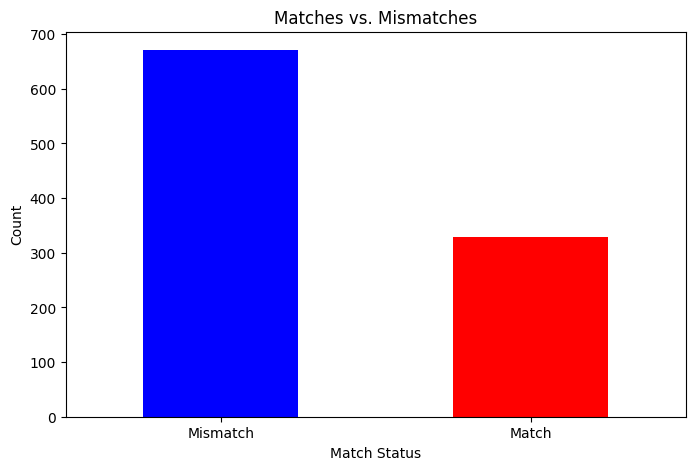

In [6]:
# 일치 및 불일치 개수 계산
match_counts = df["Objective-Funnel Match"].value_counts()

print(match_counts)

plt.figure(figsize=(8, 5))
match_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Matches vs. Mismatches')
plt.xlabel('Match Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

  Objective-Funnel Match         ROI
0                  Match  114.621641
1               Mismatch   90.886915


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27284\2231808073.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Objective-Funnel Match"], y=df["ROI"], palette=colors)


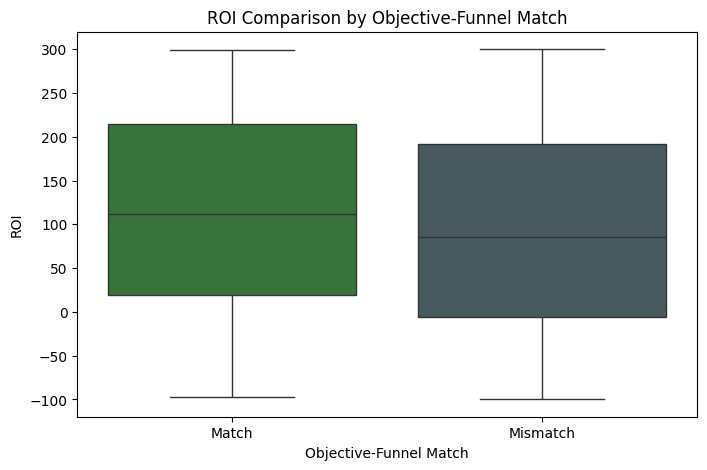

In [7]:
# 목표-퍼널 일치 여부에 따른 ROI 비교

print(df.groupby("Objective-Funnel Match")["ROI"].mean().reset_index())

colors = ["#2E7D32", "#455A64"]
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Objective-Funnel Match"], y=df["ROI"], palette=colors)
plt.xlabel("Objective-Funnel Match")
plt.ylabel("ROI")
plt.title("ROI Comparison by Objective-Funnel Match")
plt.show()

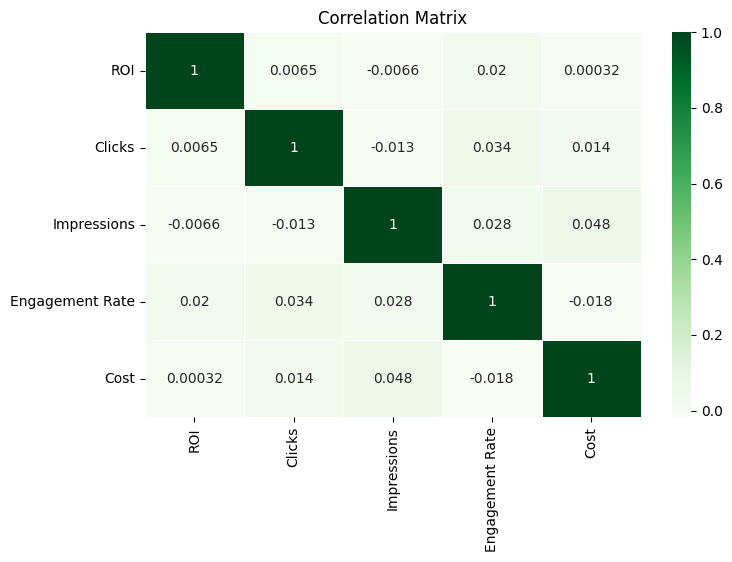

In [8]:
# 수치형 변수 상관관계 행렬 히트맵
correlation_matrix = df[["ROI", "Clicks", "Impressions", "Engagement Rate", "Cost"]].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="Greens", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [9]:
# 퍼널 일치 변수 ANOVA 검정

roi_groups = [df[df["Objective-Funnel Match"] == group]["ROI"] for group in df["Objective-Funnel Match"].unique()]
anova_result = stats.f_oneway(*roi_groups)
print(f"ANOVA result: F={anova_result.statistic}, p={anova_result.pvalue}")

ANOVA result: F=9.402293223969906, p=0.00222548429561018


In [10]:
import statsmodels.api as sm

# 회귀 분석
df["Match"] = df["Objective-Funnel Match"].apply(lambda x: 1 if x == "Match" else 0)
X = df[["Clicks", "Impressions", "Engagement Rate", "Cost", "Match"]]
X = sm.add_constant(X) 
y = df["ROI"]
model = sm.OLS(y, X).fit()

r2_score = model.rsquared
print("R² 스코어:", r2_score)

R² 스코어: 0.009963761720048758


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27284\3352228916.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Clicks", "Impressions", "Engagement Rate", "Cost", "Match"], y=model.params[1:], palette=colors)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27284\3352228916.py:3: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=["Clicks", "Impressions", "Engagement Rate", "Cost", "Match"], y=model.params[1:], palette=colors)


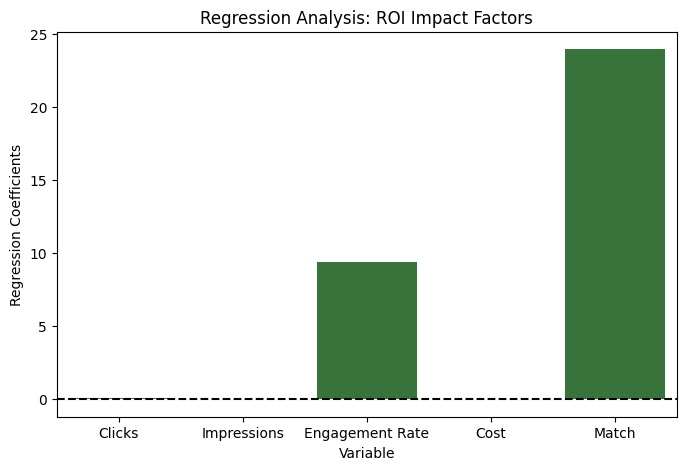

In [11]:
# 회귀 분석 결과 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=["Clicks", "Impressions", "Engagement Rate", "Cost", "Match"], y=model.params[1:], palette=colors)
plt.xlabel("Variable")
plt.ylabel("Regression Coefficients")
plt.title("Regression Analysis: ROI Impact Factors")
plt.axhline(0, color="black", linestyle="--")
plt.show()

In [12]:
# 타겟 오디언스별 연도별 캠페인 개수
campaign_counts = df.groupby(["Year", "Target Audience"])["Campaign ID"].nunique().unstack(fill_value=0)

# 증감률
campaign_change_rate = campaign_counts.pct_change(axis=0) * 100

# 타겟 오디언스별 연도별 ROI
roi_sum = df.groupby(["Year", "Target Audience"])["ROI"].sum().unstack(fill_value=0)

# ROI 증감률
roi_change_rate = roi_sum.pct_change(axis=0) * 100

results = []
for target in campaign_counts.columns:
    campaign_rate = campaign_change_rate[target].iloc[-1] if not campaign_change_rate[target].isnull().all() else None
    roi_rate = roi_change_rate[target].iloc[-1] if not roi_change_rate[target].isnull().all() else None
    results.append({
        "타겟 그룹": target,
        "캠페인 개수 감소율 (%)": f"{campaign_rate:.2f}%" if campaign_rate is not None else None,
        "ROI 변화율 (%)": f"{roi_rate:.2f}%" if roi_rate is not None else None
    })
results_df = pd.DataFrame(results)

print(results_df)

                 타겟 그룹 캠페인 개수 감소율 (%) ROI 변화율 (%)
0         New Visitors        -22.63%     -33.04%
1  Returning Customers         -2.17%      -4.86%
2   Segmented Audience          5.83%       6.55%
3          Subscribers        -14.84%      -2.23%


In [13]:
# 광고 채널 및 트래픽 유입원별 ROI 변화 분석
channel_roi = df.groupby(["Year", "Channel"])["ROI"].sum().reset_index()
source_roi = df.groupby(["Year", "Source"])["ROI"].sum().reset_index()

# 광고 채널 및 트래픽 유입원별 ROI 변화율 계산
channel_roi_change = channel_roi.pivot(index="Channel", columns="Year", values="ROI").reset_index()
channel_roi_change["ROI Change (%)"] = ((channel_roi_change[2023] - channel_roi_change[2022]) / channel_roi_change[2022]) * 100

source_roi_change = source_roi.pivot(index="Source", columns="Year", values="ROI").reset_index()
source_roi_change["ROI Change (%)"] = ((source_roi_change[2023] - source_roi_change[2022]) / source_roi_change[2022]) * 100

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27284\915703416.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_roi_change, x="Channel", y="ROI Change (%)", palette="Greens", ax=ax)


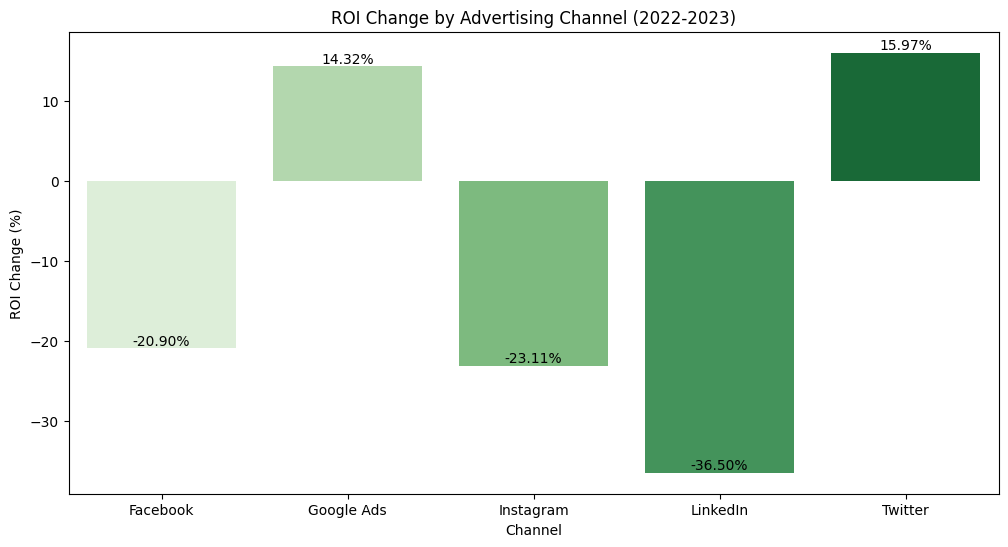

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27284\915703416.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=source_roi_change, x="Source", y="ROI Change (%)", palette="Greys", ax=ax)


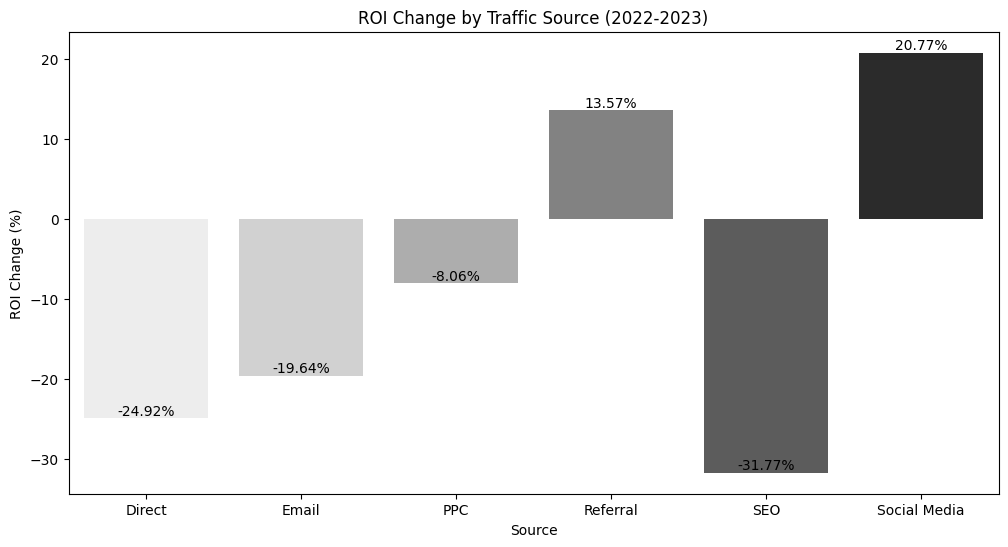

In [14]:
# 광고 채널 및 트래픽 유입원별 ROI 변화율 시각화
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=channel_roi_change, x="Channel", y="ROI Change (%)", palette="Greens", ax=ax)
for i, row in enumerate(channel_roi_change["ROI Change (%)"]):
    ax.text(i, row, f'{row:.2f}%', ha='center', va='bottom', fontsize=10)
ax.set_title("ROI Change by Advertising Channel (2022-2023)")
plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=source_roi_change, x="Source", y="ROI Change (%)", palette="Greys", ax=ax)
for i, row in enumerate(source_roi_change["ROI Change (%)"]):
    ax.text(i, row, f'{row:.2f}%', ha='center', va='bottom', fontsize=10)
ax.set_title("ROI Change by Traffic Source (2022-2023)")
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27284\66452890.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=new_visitors_channel_change, x="Channel", y="ROI Change (%)", palette="Greens", ax=ax)


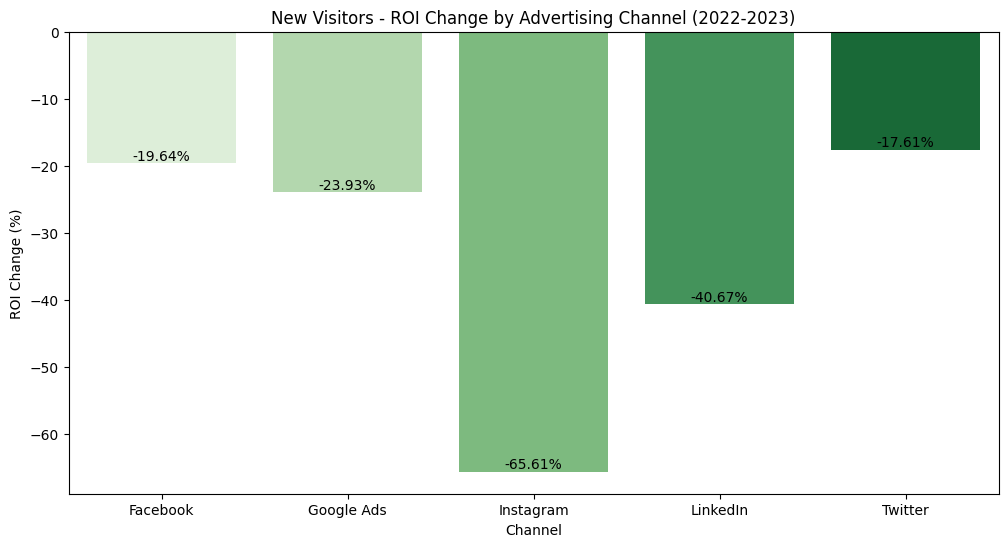

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27284\66452890.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=new_visitors_source_change, x="Source", y="ROI Change (%)", palette="Greens", ax=ax)


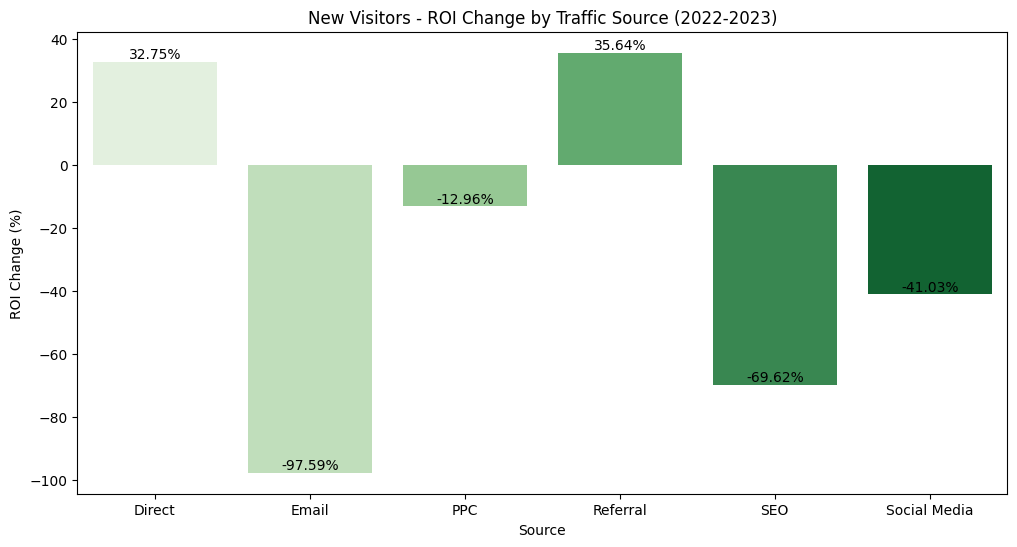

(Year     Channel     2022     2023  ROI Change (%)
 0       Facebook  2705.91  2174.48      -19.639604
 1     Google Ads  2797.11  2127.88      -23.925766
 2      Instagram  3130.73  1076.58      -65.612493
 3       LinkedIn  1888.97  1120.73      -40.669783
 4        Twitter  3543.08  2919.19      -17.608691,
 Year        Source     2022     2023  ROI Change (%)
 0           Direct  1717.78  2280.29       32.746335
 1            Email  3333.56    80.35      -97.589664
 2              PPC  2407.43  2095.52      -12.956140
 3         Referral  2264.54  3071.55       35.636818
 4              SEO  2342.12   711.50      -69.621539
 5     Social Media  2000.37  1179.65      -41.028410)

In [15]:
# 신규 방문자타겟의 광고 채널 및 트래픽 유입원별 ROI 변화 분석
new_visitors_channel = df[df["Target Audience"] == "New Visitors"].groupby(["Year", "Channel"])["ROI"].sum().reset_index()
new_visitors_source = df[df["Target Audience"] == "New Visitors"].groupby(["Year", "Source"])["ROI"].sum().reset_index()

# ROI 변화율 계산
new_visitors_channel_change = new_visitors_channel.pivot(index="Channel", columns="Year", values="ROI").reset_index()
new_visitors_channel_change["ROI Change (%)"] = ((new_visitors_channel_change[2023] - new_visitors_channel_change[2022]) / new_visitors_channel_change[2022]) * 100

new_visitors_source_change = new_visitors_source.pivot(index="Source", columns="Year", values="ROI").reset_index()
new_visitors_source_change["ROI Change (%)"] = ((new_visitors_source_change[2023] - new_visitors_source_change[2022]) / new_visitors_source_change[2022]) * 100

# 채널별 ROI 변화
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=new_visitors_channel_change, x="Channel", y="ROI Change (%)", palette="Greens", ax=ax)
for i, row in enumerate(new_visitors_channel_change["ROI Change (%)"]):
    ax.text(i, row, f'{row:.2f}%', ha='center', va='bottom', fontsize=10)
ax.set_title("New Visitors - ROI Change by Advertising Channel (2022-2023)")
plt.show()

# 유입원별 ROI 변화
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=new_visitors_source_change, x="Source", y="ROI Change (%)", palette="Greens", ax=ax)
for i, row in enumerate(new_visitors_source_change["ROI Change (%)"]):
    ax.text(i, row, f'{row:.2f}%', ha='center', va='bottom', fontsize=10)
ax.set_title("New Visitors - ROI Change by Traffic Source (2022-2023)")
plt.show()

new_visitors_channel_change, new_visitors_source_change


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27284\4227368024.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=new_visitors_channel_change, x="Channel", y="ROI Change (%)", palette="Greens", ax=ax)


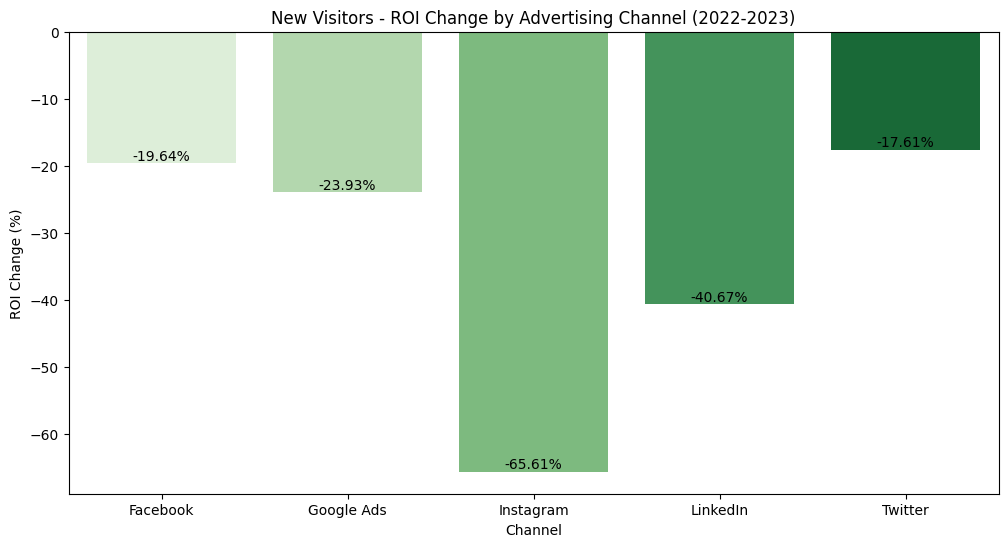

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27284\4227368024.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=new_visitors_source_change, x="Source", y="ROI Change (%)", palette="Greens", ax=ax)


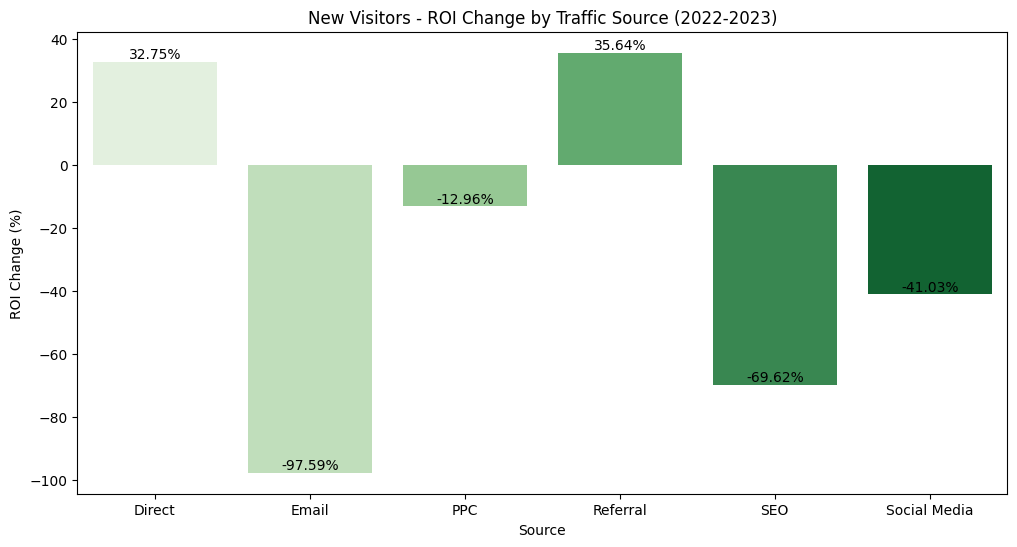

(Year     Channel     2022     2023  ROI Change (%)
 0       Facebook  2705.91  2174.48      -19.639604
 1     Google Ads  2797.11  2127.88      -23.925766
 2      Instagram  3130.73  1076.58      -65.612493
 3       LinkedIn  1888.97  1120.73      -40.669783
 4        Twitter  3543.08  2919.19      -17.608691,
 Year        Source     2022     2023  ROI Change (%)
 0           Direct  1717.78  2280.29       32.746335
 1            Email  3333.56    80.35      -97.589664
 2              PPC  2407.43  2095.52      -12.956140
 3         Referral  2264.54  3071.55       35.636818
 4              SEO  2342.12   711.50      -69.621539
 5     Social Media  2000.37  1179.65      -41.028410)

In [16]:
# 신규 방문자 광고 채널 및 트래픽 유입원별 ROI 변화 분석
new_visitors_channel = df[df["Target Audience"] == "New Visitors"].groupby(["Year", "Channel"])["ROI"].sum().reset_index()
new_visitors_source = df[df["Target Audience"] == "New Visitors"].groupby(["Year", "Source"])["ROI"].sum().reset_index()

new_visitors_channel_change = new_visitors_channel.pivot(index="Channel", columns="Year", values="ROI").reset_index()
new_visitors_channel_change["ROI Change (%)"] = ((new_visitors_channel_change[2023] - new_visitors_channel_change[2022]) / new_visitors_channel_change[2022]) * 100

new_visitors_source_change = new_visitors_source.pivot(index="Source", columns="Year", values="ROI").reset_index()
new_visitors_source_change["ROI Change (%)"] = ((new_visitors_source_change[2023] - new_visitors_source_change[2022]) / new_visitors_source_change[2022]) * 100

# 시각화 - 채널별 ROI 변화
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=new_visitors_channel_change, x="Channel", y="ROI Change (%)", palette="Greens", ax=ax)
for i, row in enumerate(new_visitors_channel_change["ROI Change (%)"]):
    ax.text(i, row, f'{row:.2f}%', ha='center', va='bottom', fontsize=10)
ax.set_title("New Visitors - ROI Change by Advertising Channel (2022-2023)")
plt.show()

# 시각화 - 유입원별 ROI 변화
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=new_visitors_source_change, x="Source", y="ROI Change (%)", palette="Greens", ax=ax)
for i, row in enumerate(new_visitors_source_change["ROI Change (%)"]):
    ax.text(i, row, f'{row:.2f}%', ha='center', va='bottom', fontsize=10)
ax.set_title("New Visitors - ROI Change by Traffic Source (2022-2023)")
plt.show()

new_visitors_channel_change, new_visitors_source_change

In [37]:
df["Target Audience"]

0             New Visitors
1       Segmented Audience
2              Subscribers
3              Subscribers
4              Subscribers
              ...         
995    Returning Customers
996           New Visitors
997     Segmented Audience
998    Returning Customers
999     Segmented Audience
Name: Target Audience, Length: 1000, dtype: object

In [ ]:
# 신규 방문자 대상 광고 채널별 ROI 차이 분석
new_visitors_df=df[df['Target Audience']=="New Visitors"]
channel_groups_new_visitors = [
    new_visitors_df[new_visitors_df["Channel"] == channel]["ROI"]
    for channel in new_visitors_df["Channel"].unique()
]

anova_channel_new_visitors = stats.f_oneway(*channel_groups_new_visitors)
anova_channel_new_visitors.pvalue

0.026917514837761225

In [ ]:
# 신규 방문자 대상 트래픽 유입원별 ROI 차이 분석
source_groups_new_visitors = [
    new_visitors_df[new_visitors_df["Source"] == source]["ROI"]
    for source in new_visitors_df["Source"].unique()
]

anova_source_new_visitors = stats.f_oneway(*source_groups_new_visitors)
anova_source_new_visitors.pvalue

0.8238528709642303

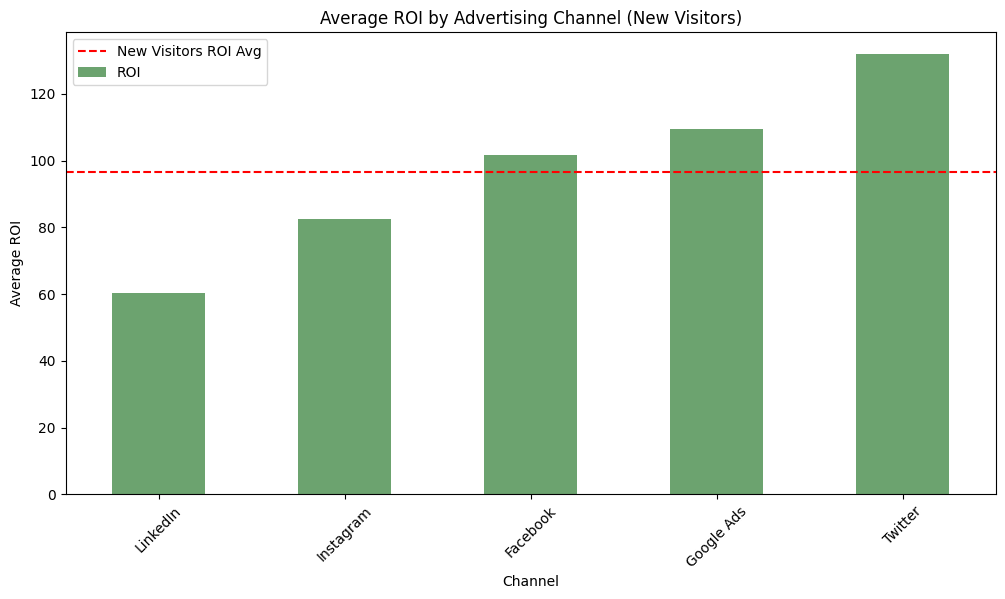

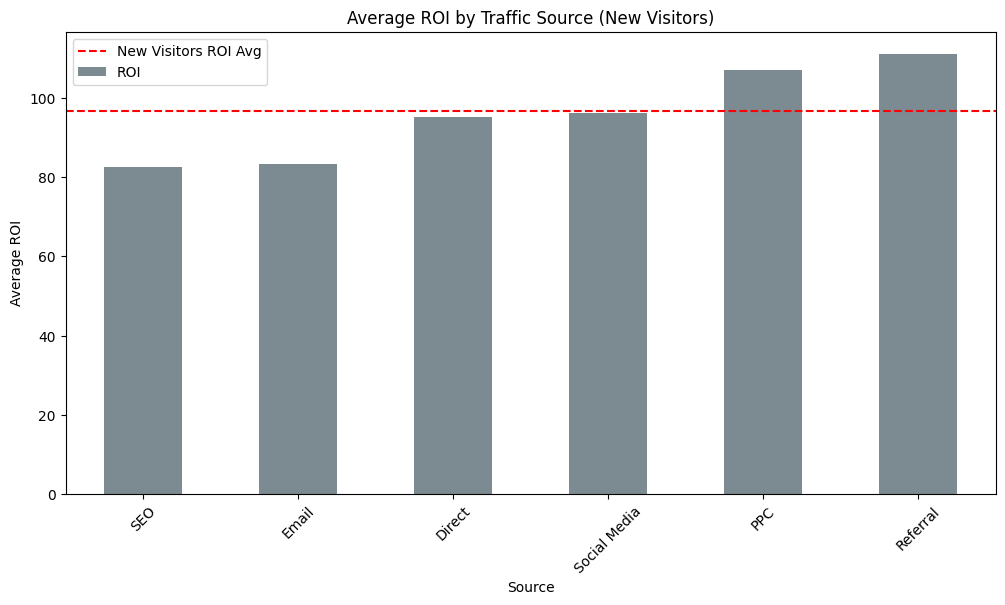

In [42]:
# 채널별 ROI 차이 시각화
plt.figure(figsize=(12, 6))
new_visitors_channel_roi = new_visitors_df.groupby("Channel")["ROI"].mean().sort_values()
new_visitors_channel_roi.plot(kind="bar", color="#2E7D32", alpha=0.7)
plt.axhline(y=new_visitors_df["ROI"].mean(), color="red", linestyle="--", label="New Visitors ROI Avg")
plt.title("Average ROI by Advertising Channel (New Visitors)")
plt.ylabel("Average ROI")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# 유입원별 ROI 차이 시각화
plt.figure(figsize=(12, 6))
new_visitors_source_roi = new_visitors_df.groupby("Source")["ROI"].mean().sort_values()
new_visitors_source_roi.plot(kind="bar", color="#455A64", alpha=0.7)
plt.axhline(y=new_visitors_df["ROI"].mean(), color="red", linestyle="--", label="New Visitors ROI Avg")
plt.title("Average ROI by Traffic Source (New Visitors)")
plt.ylabel("Average ROI")
plt.legend()
plt.xticks(rotation=45)
plt.show()